# AGENDA
- Import Modules
- Import Data

## IMPORT PYTHON MODULES

In [49]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

## IMPORT DATA

In [60]:
warnings.filterwarnings("ignore")

#import data
data = r'conversion_paths.csv'
cp = pd.read_csv(data)

cp.head()

,user_pseudo_id,medium_path,conversion_flag,first_touchpoint,conversion_timestamp
0,flN8vT0gmTR1v8Ixommd1+u8s4ZvO8No7p7wl0X1v6Y+4z...,NaN,0,2022-12-28 00:00:01.914383 UTC,NaN
1,rgJvzjwn131LAGM5p0MZLCniNp8xX9VnGk861Dgu1wXNAA...,NaN,0,2022-12-28 00:00:04.792183 UTC,NaN
2,+JIUpNSpBdH11qifFKE/DwVZ5jozE6X2jJULmP3SZ0APUl...,NaN,0,2022-12-28 00:00:33.063 UTC,NaN
3,xO4dP3GBXDpOxHNwFIDCBnMKI1cBhsdZH+Eru7eyEoc0o8...,NaN,1,2022-12-28 00:00:52.439504 UTC,2023-01-23 14:16:55.060907 UTC
4,nP78ikNKi2iu1IJUO+LWIPcoByh3ZWFvlIzIl174i1jCuK...,paidsocial,0,2022-12-28 00:00:52.722434 UTC,NaN


In [53]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173982 entries, 0 to 173981
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   user_pseudo_id        173982 non-null  object
 1   medium_path           71009 non-null   object
 2   conversion_flag       173982 non-null  int64 
 3   first_touchpoint      173982 non-null  object
 4   conversion_timestamp  5475 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.6+ MB


## Data Preprocessing and Cleaning

In [3]:
# Filter out rows with null medium_path
data_filtered = cp[cp['medium_path'].notnull()]

data_filtered['first_touchpoint'] = pd.to_datetime(data_filtered['first_touchpoint'])
data_filtered['conversion_timestamp'] = pd.to_datetime(data_filtered['conversion_timestamp'])


In [4]:
data_filtered.head()

,user_pseudo_id,medium_path,conversion_flag,first_touchpoint,conversion_timestamp
4,nP78ikNKi2iu1IJUO+LWIPcoByh3ZWFvlIzIl174i1jCuK...,paidsocial,0,2022-12-28 00:00:52.722434+00:00,NaT
5,Kkx/yH2k8X5rWdx+wG7DPuxpEyCsvSNwDqr4BzWGpxQw38...,cpc,0,2022-12-28 00:01:01.875587+00:00,NaT
6,brAeKj/gaKj8RkzQBIJfe/5XDKShTLwOcTh6yXQink4Kuo...,organic,0,2022-12-28 00:01:15.005975+00:00,NaT
9,4i0jYrhlk2CNR94hRIat8WPFLkU8dRdcPgKA1oDlwsWbUe...,cpc,0,2022-12-28 00:02:08.431349+00:00,NaT
10,JDClr9MBvuQkNi/PeCvCFScJ0NL/3qIlq0ZWVYzoGSbsNC...,paidsocial,0,2022-12-28 00:02:24.791342+00:00,NaT


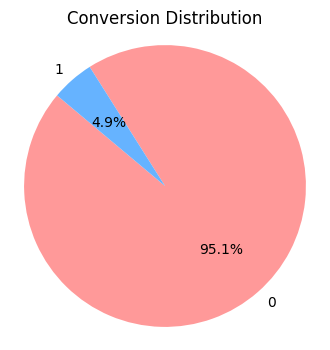

In [5]:
#ax = sns.countplot(data = data_filtered, x="conversion_flag")

# Step 1: Extract the counts
counts = data_filtered['conversion_flag'].value_counts()

# Step 2: Calculate the percentages
percentages = counts / counts.sum() * 100

# Step 3: Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Conversion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [6]:
# Function to split and expand medium paths
def expand_medium_path(path):
    if pd.notnull(path):
        steps = path.split(',')
        return pd.Series(steps)
    else:
        return pd.Series([None])

# Apply the function to the medium_path column
expanded_paths = data_filtered['medium_path'].apply(expand_medium_path)

expanded_data = pd.concat([data_filtered, expanded_paths], axis=1)

# Define the maximum number of steps
max_steps = 111

# Create a list of column names
column_names = ['user_pseudo_id', 'medium_path', 'conversion_flag', 'first_touchpoint', 'conversion_timestamp']
for i in range(1, max_steps + 1):
    column_names.append(f'step{i}')

# Assign the column names to the DataFrame
expanded_data.columns = column_names

#expanded_data.head(15)

In [7]:
expanded_data.head(15)

,user_pseudo_id,medium_path,conversion_flag,first_touchpoint,conversion_timestamp,step1,step2,step3,step4,step5,...,step102,step103,step104,step105,step106,step107,step108,step109,step110,step111
4,nP78ikNKi2iu1IJUO+LWIPcoByh3ZWFvlIzIl174i1jCuK...,paidsocial,0,2022-12-28 00:00:52.722434+00:00,NaT,paidsocial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kkx/yH2k8X5rWdx+wG7DPuxpEyCsvSNwDqr4BzWGpxQw38...,cpc,0,2022-12-28 00:01:01.875587+00:00,NaT,cpc,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,brAeKj/gaKj8RkzQBIJfe/5XDKShTLwOcTh6yXQink4Kuo...,organic,0,2022-12-28 00:01:15.005975+00:00,NaT,organic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4i0jYrhlk2CNR94hRIat8WPFLkU8dRdcPgKA1oDlwsWbUe...,cpc,0,2022-12-28 00:02:08.431349+00:00,NaT,cpc,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,JDClr9MBvuQkNi/PeCvCFScJ0NL/3qIlq0ZWVYzoGSbsNC...,paidsocial,0,2022-12-28 00:02:24.791342+00:00,NaT,paidsocial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,+kb+nwGF9iTcHXXgvHszlWeQLO1dxXlncw4YLR3JEBVJyj...,paidsocial,0,2022-12-28 00:03:45.109434+00:00,NaT,paidsocial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,jNPY7CFHQQ357ZqBTiMlYNfX2FFoGs9AIBTEG4SKP54Dlg...,gotoweb,0,2022-12-28 00:04:45.740631+00:00,NaT,gotoweb,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,RB8Yadge42beQcpxhZQlgHTPCnFDydSgrZapYMdWtNkHLg...,paidsocial,0,2022-12-28 00:05:38.993307+00:00,NaT,paidsocial,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,xSj9j9Y/Van7PMtBpdN0zTCx0/gqzV5hFA5wy9kswCB1CZ...,"cpc,email,cpc",0,2022-12-28 00:06:03.526154+00:00,NaT,cpc,email,cpc,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Rk/Lfpr8aLlShdqmGheoaqU7aydKIskNFf91ovfFMniU5t...,"organic,organic,organic,organic,organic,organi...",0,2022-12-28 00:06:29.739224+00:00,NaT,organic,organic,organic,organic,organic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
expanded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71009 entries, 4 to 173981
Columns: 116 entries, user_pseudo_id to step111
dtypes: datetime64[ns, UTC](2), int64(1), object(113)
memory usage: 63.4+ MB


## Path Length Analysis:


### converted users

Distribution of Path Lengths:
1     2245
2      581
3      269
4      131
5       76
6       59
7       30
8       21
10      15
9       14
13       8
11       6
15       6
12       5
19       4
21       2
17       2
42       2
16       1
22       1
23       1
33       1
27       1
28       1
74       1
34       1
25       1
18       1
29       1
20       1
14       1
Name: Path Length, dtype: int64


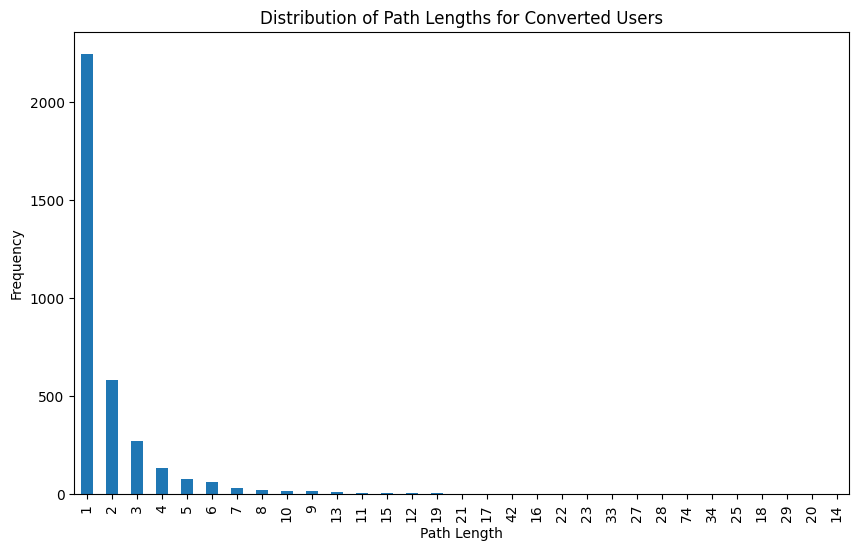


Average Path Length: 2.02


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

converted_users = data_filtered[data_filtered['conversion_flag'] == 1]

# Expand medium paths into separate steps
expanded_paths = converted_users['medium_path'].str.split(',', expand=True)

# Calculate path lengths
path_lengths = expanded_paths.count(axis=1)

# Create a DataFrame for path length analysis
path_length_analysis = pd.DataFrame({
    'Path Length': path_lengths
})

# Calculate the average path length
average_path_length = path_length_analysis['Path Length'].mean()

# Print the distribution of path lengths
print("Distribution of Path Lengths:")
print(path_length_analysis['Path Length'].value_counts())

# Plot the distribution of path lengths
plt.figure(figsize=(10, 6))
path_length_analysis['Path Length'].value_counts().plot(kind='bar')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Path Lengths for Converted Users')
plt.show()

# Calculate and print the average path length
print(f"\nAverage Path Length: {average_path_length:.2f}")

In [65]:
total_path_length = len(path_length_analysis['Path Length'])
print(total_path_length)


67520


In [ ]:

# Calculate path lengths
path_lengths = expanded_paths.count(axis=1)

percent = path_lengths / total_path_length * 100

# Create a DataFrame for path length analysis
path_length_analysis = pd.DataFrame({
    'Path Length': path_lengths,
    'total of %': percent
})

# Calculate the average path length
average_path_length = path_length_analysis['Path Length'].mean()

# Print the distribution of path lengths
print("Distribution of Path Lengths:")
print(path_length_analysis['Path Length'].value_counts())

# Plot the distribution of path lengths
plt.figure(figsize=(10, 6))
path_length_analysis['Path Length'].value_counts().plot(kind='bar')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Path Lengths for Converted Users')
plt.show()

# Calculate and print the average path length
print(f"\nAverage Path Length: {average_path_length:.2f}"

### not converted users

Distribution of Path Lengths:
1      55119
2       6636
3       2401
4       1173
5        666
6        348
7        259
8        183
9        121
10        97
11        71
12        57
13        43
14        35
15        33
20        27
19        26
17        25
18        22
16        21
21        15
24        15
26        14
25        12
23        12
22        12
29         9
27         7
28         5
35         4
30         4
36         4
51         4
39         3
37         3
33         3
44         3
34         2
42         2
31         2
47         2
65         2
38         2
40         2
43         2
80         2
55         2
48         1
67         1
57         1
59         1
41         1
111        1
64         1
50         1
Name: Path Length, dtype: int64


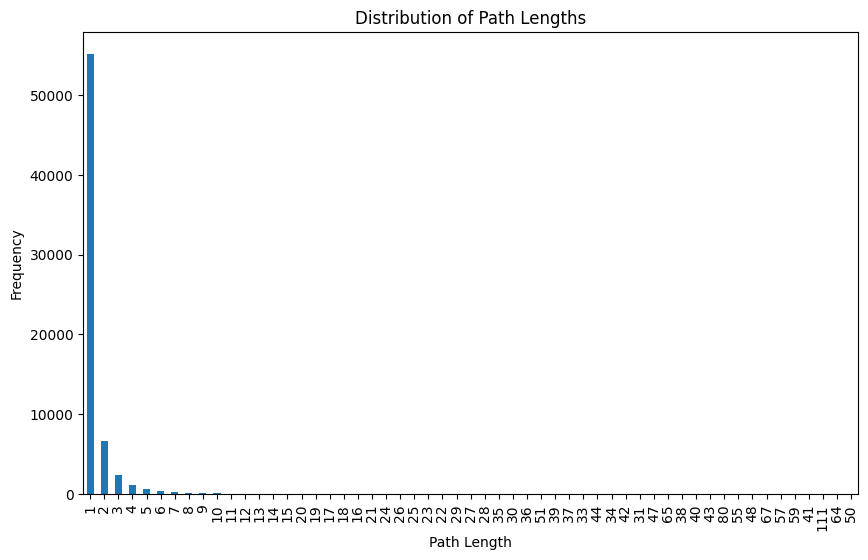


Average Path Length: count    67520.000000
mean         1.499156
std          2.135205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        111.000000
Name: Path Length, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

not_converted_users = data_filtered[data_filtered['conversion_flag'] == 0]

# Expand medium paths into separate steps
expanded_paths = not_converted_users['medium_path'].str.split(',', expand=True)

# Calculate path lengths
path_lengths = expanded_paths.count(axis=1)

# Create a DataFrame for path length analysis
path_length_analysis = pd.DataFrame({
    'Path Length': path_lengths
})

# Calculate the average path length
average_path_length = path_length_analysis['Path Length'].describe()

# Print the distribution of path lengths
print("Distribution of Path Lengths:")
print(path_length_analysis['Path Length'].value_counts())

# Plot the distribution of path lengths
plt.figure(figsize=(10, 6))
path_length_analysis['Path Length'].value_counts().plot(kind='bar')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Path Lengths')
plt.show()

# Calculate and print the average path length
print(f"\nAverage Path Length: {average_path_length}")

## for conversions after one step which traffic sourse works better

In [10]:
toDo add CD as%

SyntaxError: invalid syntax (1024916114.py, line 1)

organic        622
cpc            607
email          595
affiliates     205
referral       106
paidsocial      77
gotoweb         31
chumba_post      2
Name: step1, dtype: int64


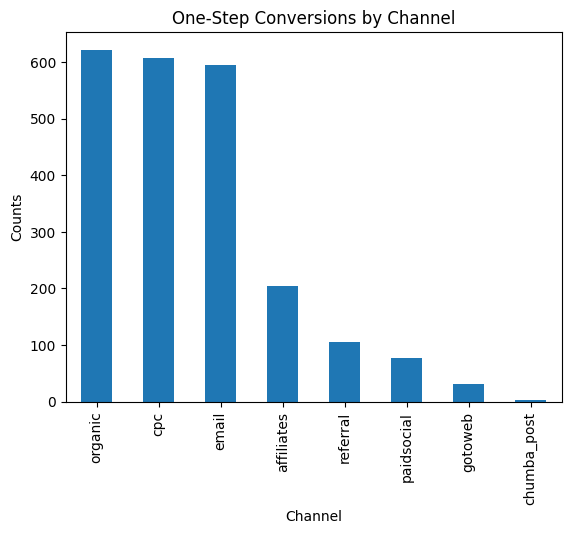

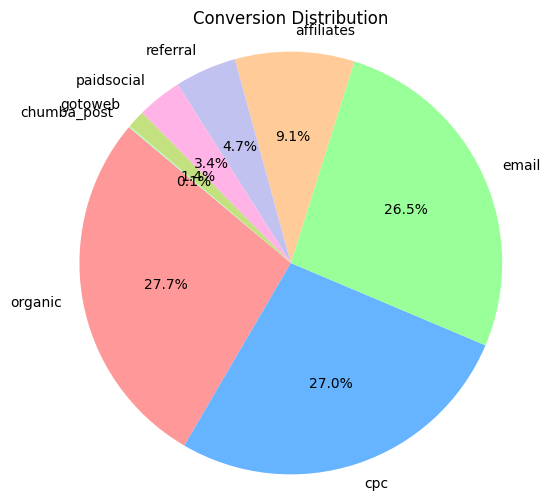

In [11]:
converted_users = expanded_data[expanded_data['conversion_flag'] == 1]

one_step_counts = converted_users[(converted_users['step2'].isnull())]['step1'].value_counts()
print(one_step_counts)

# Calculate the total number of conversions
total_conversions = one_step_counts.sum()

# Calculate percentages for each channel
percentages = (one_step_counts / total_conversions) * 100

one_step_counts.plot(kind='bar', stacked=True)
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("One-Step Conversions by Channel")
plt.show()

# Define colors for each channel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#aaffc3']




# Step 3: Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Conversion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

for conversions with one step path organic, cpc, and email works the best
maybe improve 25 %

but paidsocial have less conversions?? maybe it works better in sequence 

lets anallyse dipper

## Lets check conversion rates per traffic sourse 

### First click attribution

In [21]:
# Filter out rows with null medium_path
data_filtered = cp[cp['medium_path'].notnull()]
data_filtered['medium_steps'] = data_filtered['medium_path'].str.split(',')

total_impressions = expanded_data['step1'].value_counts()

df = data_filtered.explode('medium_steps')


#total_impressions = total_impressions[~total_impressions.index.isin(['undefined', 'influencer', 'affili' ])]

# Filter converted users
converted_users = expanded_data[expanded_data['conversion_flag'] == 1]

# Count occurrences of each medium path step (first step)
first_step_counts = converted_users['step1'].value_counts()

# Calculate total conversions
total_conversions = len(converted_users)


In [23]:

# Explode the medium_path to separate each step
df['medium_steps'] = data_filtered['medium_path'].str.split(',')
exploded_df = df.explode('medium_steps')

# Count the occurrences of each traffic source across all steps
traffic_source_counts = exploded_df['medium_steps'].value_counts()

# Calculate conversion rates for each traffic source (first step)
conversion_rates = first_step_counts / total_conversions * 100

# Create a DataFrame for first-click attribution analysis
first_click_attribution = pd.DataFrame({
    'Traffic Source': first_step_counts.index,
    'Conversions': first_step_counts,
    'Conversion Distribution Rate (%)': conversion_rates
})

#Leads devision by traffic sourse
# Print the conversion rates based on first-click attribution
print(first_click_attribution.sort_values(by='Conversion Distribution Rate (%)', ascending=False))



                  Traffic Source  Conversions  \
organic                  organic          934   
cpc                          cpc          899   
email                      email          828   
affiliates            affiliates          464   
referral                referral          181   
paidsocial            paidsocial          103   
gotoweb                  gotoweb           77   
chumba_post          chumba_post            2   
company_profile  company_profile            1   

                 Conversion Distribution Rate (%)  
organic                                 26.769848  
cpc                                     25.766695  
email                                   23.731728  
affiliates                              13.298940  
referral                                 5.187733  
paidsocial                               2.952135  
gotoweb                                  2.206936  
chumba_post                              0.057323  
company_profile                          

<Figure size 1000x600 with 0 Axes>

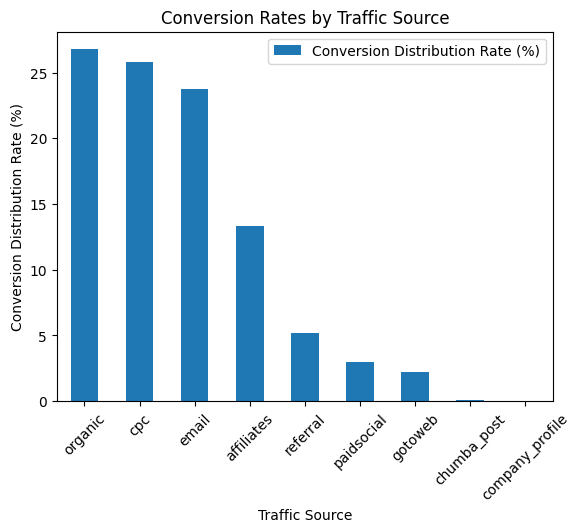

                 Conversions  Clicks  Conversion Distribution Rate (%)
company_profile          1.0       6                         16.666667
gotoweb                 77.0     749                         10.280374
organic                934.0    9187                         10.166540
email                  828.0   10919                          7.583112
chumba_post              2.0      30                          6.666667
affiliates             464.0    7064                          6.568516
cpc                    899.0   14388                          6.248262
referral               181.0    7119                          2.542492
paidsocial             103.0   21542                          0.478136
affili                   NaN       1                               NaN
influencer               NaN       3                               NaN
undefined                NaN       1                               NaN


In [25]:

import matplotlib.pyplot as plt

# Plotting medium path conversion rates
plt.figure(figsize=(10, 6))
first_click_attribution.plot(kind='bar', x='Traffic Source', y='Conversion Distribution Rate (%)')
plt.title('Conversion Rates by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Conversion Distribution Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Calculate conversion rates for each traffic source
conversion_rates = (first_step_counts / total_impressions) * 100

# Create a DataFrame for conversion rate by traffic source analysis
conversion_rate_by_source = pd.DataFrame({
    #'Traffic Source': traffic_source_counts.index,
    'Conversions': first_step_counts,
    'Clicks': total_impressions,
    'Conversion Distribution Rate (%)': conversion_rates
})

#print(conversion_rate_by_source)
# Print the conversion rates by traffic source
print(conversion_rate_by_source.sort_values(by='Conversion Distribution Rate (%)', ascending=False))

# import matplotlib.pyplot as plt

# # Plotting medium path conversion rates
# plt.figure(figsize=(10, 6))
# conversion_rate_by_source.plot(kind='bar', x='Traffic Source', y='Conversion Rate (%)')
# plt.title('Conversion Rates by Traffic Source')
# plt.xlabel('Traffic Source')
# plt.ylabel('Conversion Rate (%)')
# plt.xticks(rotation=45)
# plt.show()

Lets also check last click attribution model

## Last click attribution

In [26]:
# Filter out rows with null medium_path
data_filtered = cp[cp['medium_path'].notnull()]
data_filtered['medium_steps'] = data_filtered['medium_path'].str.split(',')

# Ensure all steps are exploded into separate rows
df = data_filtered.explode('medium_steps')

data_filtered['last_step'] = data_filtered['medium_steps'].apply(lambda x: x[-1] if isinstance(x, list) else None)

total_impressions_ls = data_filtered['last_step'].value_counts()

# Filter out the rows with "undefined" and "influencer" traffic sources
#total_impressions_ls = total_impressions_ls[~total_impressions_ls.index.isin(['undefined', 'influencer', 'affili','a' ])]

# Print the updated DataFrame
#print(total_impressions_ls)

# Filter converted users
converted_users_ls = data_filtered[data_filtered['conversion_flag'] == 1]

# Count occurrences of each medium path step (first step)
last_step_counts = converted_users_ls['last_step'].value_counts()
#print(last_step_counts)

# Calculate conversion rates for each traffic source
conversion_rates = (last_step_counts / total_impressions) * 100

# Create a DataFrame for conversion rate by traffic source analysis
conversion_rate_by_source = pd.DataFrame({
    #'Traffic Source': traffic_source_counts.index,
    'Conversions': last_step_counts,
    'Clicks': total_impressions,
    'Conversion Rate (%)': conversion_rates
})

#print(conversion_rate_by_source)
# Print the conversion rates by traffic source
print(conversion_rate_by_source.sort_values(by='Conversion Rate (%)', ascending=False))

                 Conversions  Clicks  Conversion Rate (%)
company_profile          1.0       6            16.666667
gotoweb                101.0     749            13.484646
organic                985.0    9187            10.721672
email                  933.0   10919             8.544739
chumba_post              2.0      30             6.666667
affiliates             414.0    7064             5.860702
cpc                    747.0   14388             5.191827
referral               213.0    7119             2.991993
paidsocial              93.0   21542             0.431715
affili                   NaN       1                  NaN
influencer               NaN       3                  NaN
undefined                NaN       1                  NaN


paidsocial works bad for both attribution models let's check how offen users come from this ftaffic shoursce 

### Clicks overall

In [27]:
import pandas as pd

# Load the dataset

# Data cleaning
#cp['first_touchpoint'] = pd.to_datetime(df['first_touchpoint'])
#cp['conversion_timestamp'] = pd.to_datetime(df['conversion_timestamp'])

# Count the occurrences of each traffic source across all steps
traffic_source_counts = exploded_df['medium_steps'].value_counts()

print(traffic_source_counts)

# Calculate the total number of steps
total_steps = traffic_source_counts.sum()

# Calculate the percentage of each traffic source
traffic_source_percentages = (traffic_source_counts / total_steps) * 100

# Display the traffic sources and their percentages
print(traffic_source_percentages)

organic            197931
gotoweb             64612
cpc                 63597
email               58854
affiliates          49462
referral            36764
paidsocial          30191
chumba_post           163
company_profile        14
influencer             10
a                       2
affili                  1
undefined               1
Name: medium_steps, dtype: int64
organic            39.459771
gotoweb            12.881129
cpc                12.678777
email              11.733207
affiliates          9.860806
referral            7.329317
paidsocial          6.018915
chumba_post         0.032496
company_profile     0.002791
influencer          0.001994
a                   0.000399
affili              0.000199
undefined           0.000199
Name: medium_steps, dtype: float64


### paidsocial analysis

Frequency of 'paidsocial' in different steps:
 1     21603
2       890
3       195
4        80
5        37
6        22
7        13
8        10
9         9
10        7
11        5
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        2
21        2
22        2
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
dtype: int64
Conversion rate for paths involving 'paidsocial': 0.49%
Common paths involving 'paidsocial':
 paidsocial                                                20427
paidsocial,paidsocial                                       654
paidsocial,referral                                         162
paidsocial,paidsocial,paidsocial                            109
paidsocial,paidsocial,paidsocial,paidsocial                  39
referral,paidsocial                                       

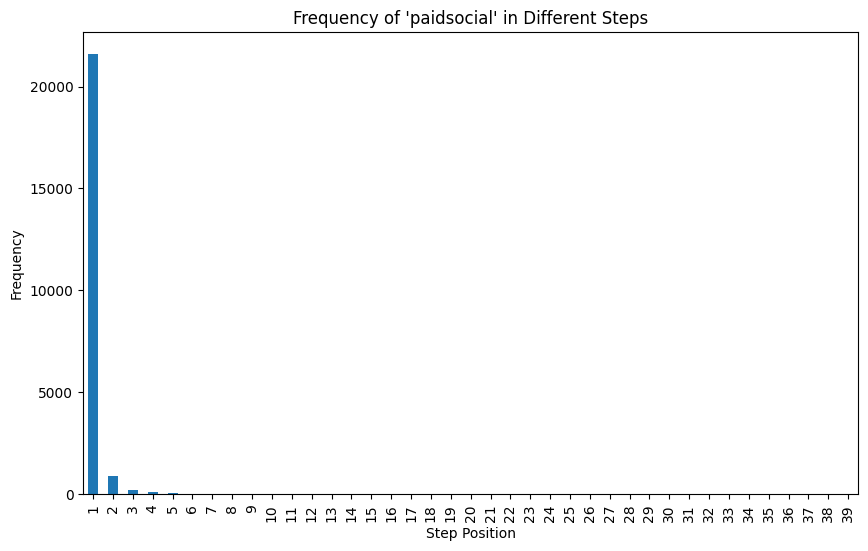

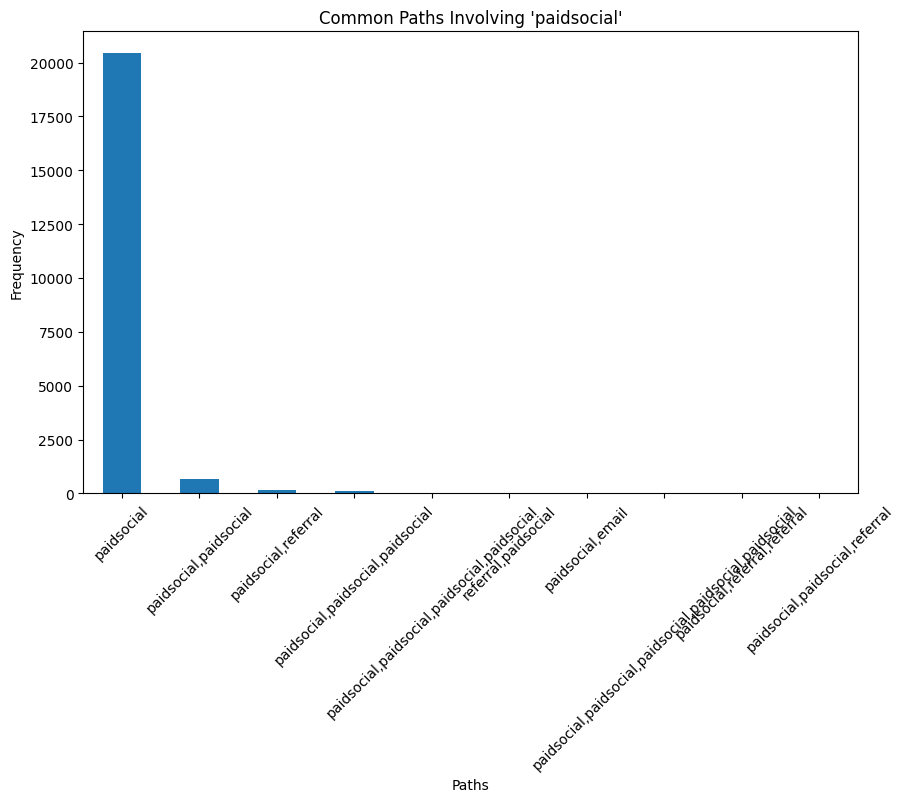

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = r'conversion_paths.csv'
#cp = pd.read_csv(data)

# Data cleaning
cp['first_touchpoint'] = pd.to_datetime(cp['first_touchpoint'])
cp['conversion_timestamp'] = pd.to_datetime(cp['conversion_timestamp'])

# Filter out rows with null medium_path
data_filtered = cp[cp['medium_path'].notnull()]
data_filtered['medium_steps'] = data_filtered['medium_path'].str.split(',')

# Ensure all steps are exploded into separate rows
df = data_filtered.explode('medium_steps')

# Analyze "paidsocial" channel
paidsocial_data = df[df['medium_steps'] == 'paidsocial']

# Frequency of "paidsocial" in different steps
step_counts = paidsocial_data.groupby('user_pseudo_id').cumcount() + 1
step_frequency = step_counts.value_counts().sort_index()
print("Frequency of 'paidsocial' in different steps:\n", step_frequency)

# Conversion rate when "paidsocial" is involved
paidsocial_users = data_filtered[data_filtered['medium_steps'].apply(lambda steps: 'paidsocial' in steps if isinstance(steps, list) else False)]
paidsocial_conversion_rate = paidsocial_users['conversion_flag'].mean() * 100
print(f"Conversion rate for paths involving 'paidsocial': {paidsocial_conversion_rate:.2f}%")

# Common paths involving "paidsocial"
common_paths_with_paidsocial = paidsocial_users['medium_path'].value_counts().head(10)
print("Common paths involving 'paidsocial':\n", common_paths_with_paidsocial)

# Time to conversion with "paidsocial" involvement
paidsocial_conversions = paidsocial_users[paidsocial_users['conversion_flag'] == 1]
paidsocial_conversions['time_to_conversion'] = paidsocial_conversions['conversion_timestamp'] - paidsocial_conversions['first_touchpoint']
time_to_conversion_stats = paidsocial_conversions['time_to_conversion'].describe()
print("Time to Conversion Stats for 'paidsocial' involvement:\n", time_to_conversion_stats)

# Plot the frequency of 'paidsocial' in different steps
plt.figure(figsize=(10, 6))
step_frequency.plot(kind='bar')
plt.title("Frequency of 'paidsocial' in Different Steps")
plt.xlabel("Step Position")
plt.ylabel("Frequency")
plt.show()

# Plot common paths involving 'paidsocial'
plt.figure(figsize=(10, 6))
common_paths_with_paidsocial.plot(kind='bar')
plt.title("Common Paths Involving 'paidsocial'")
plt.xlabel("Paths")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Frequency of 'paidsocial' in different steps:
 1     21603
2       890
3       195
4        80
5        37
6        22
7        13
8        10
9         9
10        7
11        5
12        4
13        4
14        4
15        4
16        4
17        4
18        4
19        4
20        2
21        2
22        2
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
dtype: int64
Conversion rate for paths involving 'paidsocial': 0.49%
Common paths involving 'paidsocial':
 paidsocial                                                20427
paidsocial,paidsocial                                       654
paidsocial,referral                                         162
paidsocial,paidsocial,paidsocial                            109
paidsocial,paidsocial,paidsocial,paidsocial                  39
referral,paidsocial                                       

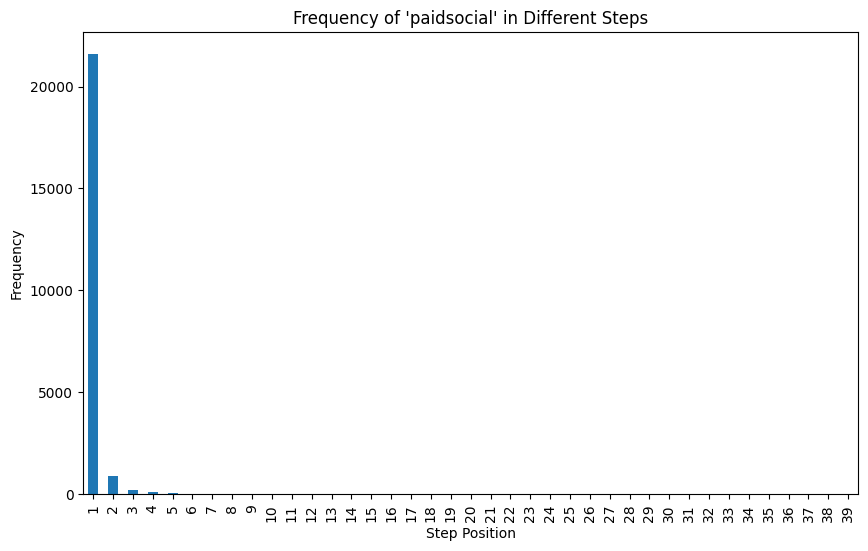

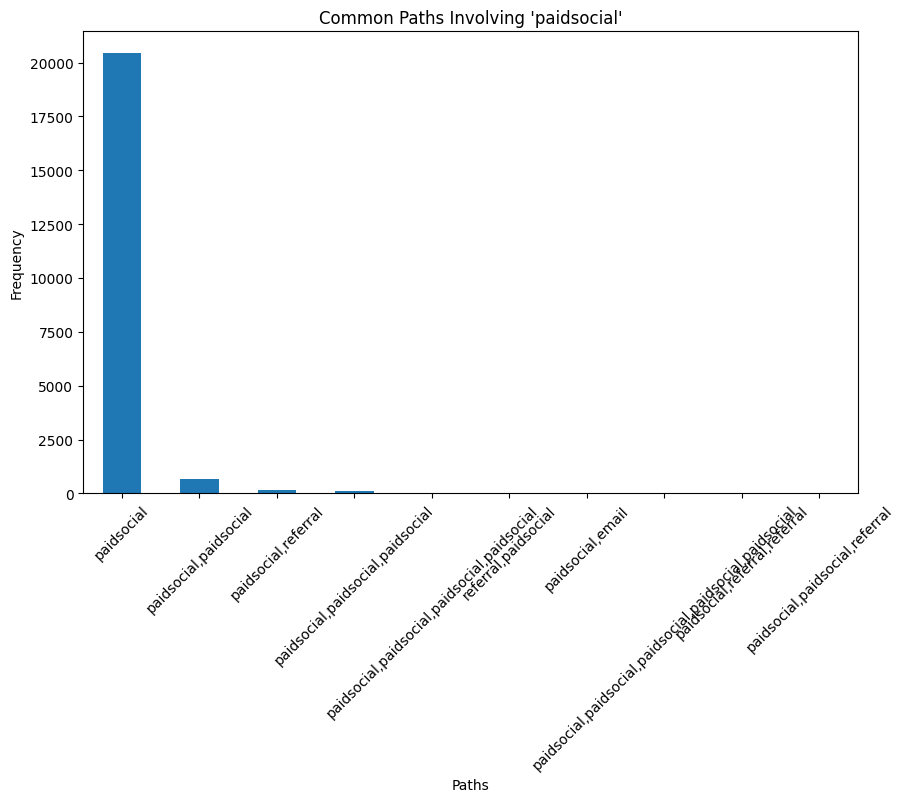

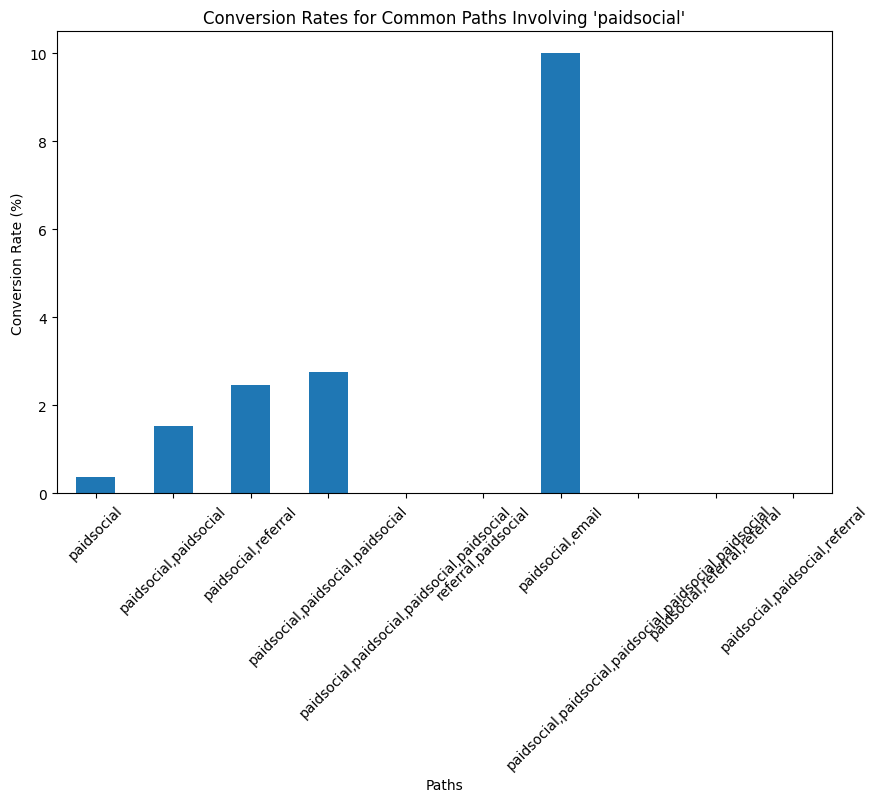

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = r'conversion_paths.csv'
#cp = pd.read_csv(data)

# Data cleaning
#cp['first_touchpoint'] = pd.to_datetime(cp['first_touchpoint'])
#cp['conversion_timestamp'] = pd.to_datetime(cp['conversion_timestamp'])

# Filter out rows with null medium_path
data_filtered = cp[cp['medium_path'].notnull()]
data_filtered['medium_steps'] = data_filtered['medium_path'].str.split(',')

# Ensure all steps are exploded into separate rows
df = data_filtered.explode('medium_steps')

# Analyze "paidsocial" channel
paidsocial_data = df[df['medium_steps'] == 'paidsocial']

# Frequency of "paidsocial" in different steps
step_counts = paidsocial_data.groupby('user_pseudo_id').cumcount() + 1
step_frequency = step_counts.value_counts().sort_index()
print("Frequency of 'paidsocial' in different steps:\n", step_frequency)

# Conversion rate when "paidsocial" is involved
paidsocial_users = data_filtered[data_filtered['medium_steps'].apply(lambda steps: 'paidsocial' in steps if isinstance(steps, list) else False)]
paidsocial_conversion_rate = paidsocial_users['conversion_flag'].mean() * 100
print(f"Conversion rate for paths involving 'paidsocial': {paidsocial_conversion_rate:.2f}%")

# Common paths involving "paidsocial"
common_paths_with_paidsocial = paidsocial_users['medium_path'].value_counts().head(10)
print("Common paths involving 'paidsocial':\n", common_paths_with_paidsocial)

# Conversions for common paths involving 'paidsocial'
conversion_counts = paidsocial_users.groupby('medium_path')['conversion_flag'].sum().loc[common_paths_with_paidsocial.index]
conversion_rates = (conversion_counts / common_paths_with_paidsocial) * 100

# Create a DataFrame for common paths with conversions and conversion rates
common_paths_analysis = pd.DataFrame({
    'Path': common_paths_with_paidsocial.index,
    'Total Occurrences': common_paths_with_paidsocial.values,
    'Conversions': conversion_counts.values,
    'Conversion Rate (%)': conversion_rates.values
})

print("Common paths involving 'paidsocial' with conversions and conversion rates:\n", common_paths_analysis)

# Time to conversion with "paidsocial" involvement
#paidsocial_conversions = paidsocial_users[paidsocial_users['conversion_flag'] == 1]
#paidsocial_conversions['time_to_conversion'] = paidsocial_conversions['conversion_timestamp'] - paidsocial_conversions['first_touchpoint']
#time_to_conversion_stats = paidsocial_conversions['time_to_conversion'].describe()
#print("Time to Conversion Stats for 'paidsocial' involvement:\n", time_to_conversion_stats)

# Plot the frequency of 'paidsocial' in different steps
plt.figure(figsize=(10, 6))
step_frequency.plot(kind='bar')
plt.title("Frequency of 'paidsocial' in Different Steps")
plt.xlabel("Step Position")
plt.ylabel("Frequency")
plt.show()

# Plot common paths involving 'paidsocial'
plt.figure(figsize=(10, 6))
common_paths_analysis.set_index('Path')['Total Occurrences'].plot(kind='bar')
plt.title("Common Paths Involving 'paidsocial'")
plt.xlabel("Paths")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Plot conversion rates for common paths involving 'paidsocial'
plt.figure(figsize=(10, 6))
common_paths_analysis.set_index('Path')['Conversion Rate (%)'].plot(kind='bar')
plt.title("Conversion Rates for Common Paths Involving 'paidsocial'")
plt.xlabel("Paths")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()


Key Insights:
Low Overall Conversion Rate:

The conversion rate for the primary "paidsocial" path is very low (0.38%). This suggests that the majority of traffic from "paidsocial" is not leading to conversions.
Repetition Without Results:

Paths with multiple "paidsocial" interactions (e.g., "paidsocial, paidsocial", "paidsocial, paidsocial, paidsocial") also show low conversion rates. This indicates that repeated exposure through "paidsocial" does not significantly increase the likelihood of conversion.
Higher Conversion Rates in Specific Combinations:

Certain combinations, such as "paidsocial, referral" and "paidsocial, email", have higher conversion rates (2.47% and 10%, respectively). This suggests that "paidsocial" might be more effective when followed by other channels.
Recommendations:
Optimize Targeting and Ad Content:

Review the targeting criteria for "paidsocial" campaigns. Ensure that the ads are reaching the right audience. Adjust the ad content to be more compelling and relevant to the target audience.
Reduce Over-Reliance on "paidsocial" Alone:

Since repeated "paidsocial" interactions alone do not lead to higher conversions, consider diversifying the marketing strategy. Integrate "paidsocial" with other channels like "referral" and "email" which have shown better conversion rates in combination.
Leverage Retargeting:

Implement retargeting strategies where users who interact with "paidsocial" ads but do not convert are targeted with follow-up ads or emails. This can help to reinforce the message and potentially increase conversion rates.
Analyze User Journey and Content Engagement:

Perform a deeper analysis of user behavior on the landing pages. Check the bounce rates, time spent on the page, and user interaction. Identify and fix potential issues on the landing pages that could be causing drop-offs.
A/B Testing:

Conduct A/B tests to try different ad creatives, landing pages, and call-to-action (CTA) messages. Identify which variations perform better and iterate based on the results.
Follow-Up Campaigns:

For paths that show higher conversion rates (e.g., "paidsocial, email"), develop follow-up campaigns specifically targeting users who initially came through "paidsocial". This could involve sending personalized emails or offers to re-engage these users.
Monitor and Adjust Budget Allocation:

Given the low conversion rate of "paidsocial" when used alone, consider reallocating some of the budget to other channels or combinations that have proven to be more effective. Continuously monitor performance and adjust the budget allocation accordingly.
Improving Attribution and Tracking:

Ensure that tracking mechanisms are accurately capturing the entire user journey. Sometimes, attribution errors can lead to misinterpretation of which channels are contributing to conversions. Implementing advanced attribution models can help in understanding the true impact of each channel.
Conclusion:
The current performance of "paidsocial" campaigns indicates that while they are generating clicks, they are not effectively converting users. By optimizing targeting, content, and integrating "paidsocial" with other channels, the marketing team can potentially improve the conversion rates. Continuous testing, analysis, and optimization will be crucial in enhancing the effectiveness of "paidsocial" campaigns.

## common conversion path

In [39]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [44]:
# Identify the most common conversion paths
common_conversion_paths = df[df['conversion_flag'] == 1]['medium_path'].value_counts().head(20)
#print("Common Conversion Paths:\n", common_conversion_paths)
common_conversion_paths.head(14)

organic                    622
cpc                        607
email                      595
email,email                220
affiliates                 205
organic,organic            158
affiliates,affiliates      152
organic,organic,organic    147
cpc,cpc                    114
referral                   106
cpc,email                   94
email,email,email           87
cpc,cpc,cpc                 84
paidsocial                  77
Name: medium_path, dtype: int64

time to conversion

In [45]:
data_filtered['first_touchpoint'] = pd.to_datetime(data_filtered['first_touchpoint'])
data_filtered['conversion_timestamp'] = pd.to_datetime(data_filtered['conversion_timestamp'])

# Calculate the time to conversion
df['time_to_conversion'] = data_filtered['conversion_timestamp'] - data_filtered['first_touchpoint']

# Filter for converted users and get descriptive stats
time_to_conversion_stats = df[df['conversion_flag'] == 1]['time_to_conversion'].describe()
print("Time to Conversion Stats:\n", time_to_conversion_stats)


Time to Conversion Stats:
 count                         7045
mean     4 days 21:35:42.254124371
std      6 days 01:30:14.053243946
min         0 days 00:00:00.003316
25%         0 days 04:55:17.367576
50%         2 days 10:00:52.031592
75%         7 days 02:07:31.002956
max        27 days 14:48:07.306419
Name: time_to_conversion, dtype: object


push users with email 

think pater name contrast efect

## Summury

1) most conversion are done after interaction only with one channel
orgain, cpc, email works the best and bring most of conversions
2) diff types of attribution also confirmed that orgain, cpc, email have highst conversion rate. And the most converted users are from 'gotoweb' (users that come from application). With this we can use users that use aplication as main audiense and also for look a like audience for another paid campains (cpc, email ..) 
3) channel that parform the lowest is 'paidsocial', it have the hights click rate but the lowest conversion. For this channel we need to pay most attaintion and provide optimisation. The current performance of "paidsocial" campaigns indicates that while they are generating clicks, they are not effectively converting users. By optimizing targeting, content, and integrating "paidsocial" with other channels, the marketing team can potentially improve the conversion rates. Continuous testing, analysis, and optimization will be crucial in enhancing the effectiveness of "paidsocial" campaigns.
4) in avarage 4 days takes user to make conversion, so we can use this time for our emai campains, to send new offers with discaunts or special proposal to convince user make a conversion + retargeting